# EMERITUS CAPSTONE PROJECT
**_NUVEEN SALES ANALYSIS:_**
The aim of the project is to build a machine learning model to predict _next year_ sales based on different explanatory variables which describe _current year_ sales.

In the following notebooks, each one of the steps in the Machine Learning model building pipeline are described. There will be a notebook for each one of the Machine Learning Pipeline steps:

1. Exploratory Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building

**This is the notebook for step 3 & 4: Feature Selection and Model Building**

## FEATURE SELECTION

`Features selection` refers to procedures that will allow us to find the vast subset of features from all the variables present in the dataset, namely it is the process to identify the most predictive features. We start with the entire dataset with all the variables and by the end of the feature selection process we end up with a smaller number of features which are typically the most predictive ones.

### Advantages of Feature Selection:

- Utilizing less number of features minimizes the risk that we may encounter due to data errors and removing redundacy which means that many features provide the same information, for example we often find variables that take only one value (constant variables) or variables that take the same value for the great majority of the observations (quasi constant variables) these variables tend to be quite useless to make predictions, so we may get rid of them.

- We also find variables with different names but identical in all of their values (duplication), so we may remove one of them.

- Finally we also find correlation and correlated variables tend to provide the same information about the target that we want to predict, so there is no need to use the two variables if they're correlated including one of them already adds most of the value that can be extracted.


During the Exploratory Data Analysis and Feature Engineering a discrimination of variables were made based on **features characteristics**.

The criteria used to _filter_ the features to be used in our model were based on the three points exposed above, namely thru an analysis of the information provided by the variables in regards to the target prediction.

The variables discarded from the raw data are:
- CONTACT_ID
- refresh_date
- no_of_Redemption_12M_1
- no_of_Redemption_12M_10K
- no_of_funds_redeemed_12M_1
- no_of_funds_Redemption_12M_10K
- no_of_assetclass_redeemed_12M_1
- no_of_assetclass_Redemption_12M_10K
- redemption_curr
- redemption_12M
- aum_AC_MONEY
- aum_AC_EQUITY
- aum_AC_PHYSICAL_COMMODITY
- aum_AC_REAL_ESTATE
- aum_P_529
- aum_P_ALT
- aum_P_UCITS
- aum_P_ETF
- aum_P_UIT
- aum_AC_FIXED_INCOME_MUNI
- aum_AC_FIXED_INCOME_TAXABLE
- aum_AC_MULTIPLE
- aum_AC_TARGET
- aum_P_CEF
- aum_P_MF
- aum_P_SMA

After a data cleaning process a dataset with the relevant variables was saved (**_Nuveen Dataset_**). This dataset will be used to further processing throughout the `pipeline` processing.


## MODEL BUILDING

We come to a point where we have our data, We have processed or engineered our variables and we have already selected the features that we want to use, so now it is time to build the Machine Learning Model.


## MACHINE LEARNING PIPELINE

In a typical machine learning pipeline, we receive our data then we perform most likely affordably an extensive data analysis where we understand the variables and understand what we are trying to predict.

Then we perform some feature engineering to leave the variables ready to be consumed by our model, we select the variables and train our machine learning models. Once we are happy with the machine learning model that we build and the performance that it shows we are able to put this model into production.

So to this end we would like to build a **Pipeline** which is basically a `sequence of feature engineering steps` that we perform to the data in order to take it from raw to the engineered state and then we can use them to train our machine learning models or to score data with the model that we did.

The pipeline has the characteristic that is clear to understand what the pipeline is doing, namely it is concise (small block of code that is reproducible). We can propagated it across our systems and is able to score new data very easily and therefore it is very easy to put into production.


## ASSEMBLING A PIPELINE

Thru the complete process to obtain a Machine Learning model, we applyed multiple feature engineering steps to tackle many aspects of the viables and next we built machine learning model with the already transformed data.
The process as we have done follows more or less these procedure:

- Impute the variables.
- Encode the variables.
- Transform the variables.
- Scale the variables.

In order to do this, we're going to use a series of **Transformers**

Now let's say we want to transform our Train dataset. the data will follow each step to produce a dataset ready to be used by the Machine Learning model. Same case if we want to trasnform our Test dataset or a new dataset and basically we need to repeat these processes again for any data that we want to transform.

As we can see the process is not complex but it could be made easier, we can assemble a `Pipeline` that contains all the feature engineering steps and if we want our machine learning model too.

A `Pipeline` is an _object_ that allow us to combine all the `Transforming steps` within one block. What we need to do is we instantiate all the feature engineering steps that we performed within the pipeline.


In [74]:
##IMPORTS SECTION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
#REGRESSION MODELS
from sklearn.linear_model import Ridge, Lasso, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
#CLASSIFICATIONS MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
#METRICS
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [28]:
##TRANSFORMER: RARE LABEL ENCODER
class RareLabelEncoder(BaseEstimator, TransformerMixin):

    def __init__(self, threshold=0.05, variables=None):
        
        self.threshold = threshold
        
        if not isinstance(variables, list):
            self.variables = [variables]
        else:
            self.variables = variables

    def fit(self, X, y=None):
        
        self.encoder_dict_ = {}
        
        for var in self.variables:
            temp = pd.Series(X[var].value_counts() / np.float(len(X)))
            self.encoder_dict_[var] = list(temp[temp >= self.threshold].index)

        return self

    def transform(self, X):
        
        X = X.copy()
        
        for feature in self.variables:
            next_cat = self.encoder_dict_[feature][-1] + 1
            X[feature] = np.where(X[feature].isin(self.encoder_dict_[feature]), X[feature], next_cat)

        return X

In [29]:
##TRANSFORMER: LOGARITMIC TRANSFORMATION
class LogaritmicTransformation(BaseEstimator, TransformerMixin):

    def __init__(self, variables=None):
        
        if not isinstance(variables, list):
            self.variables = [variables]
        else:
            self.variables = variables

    def fit(self, X, y=None):
        #Method implemented as requirement by sklearn pipeline

        return self

    def transform(self, X):
        
        X = X.copy()
        
        for feature in self.variables:
            X[feature] = np.log1p(X[feature])

        return X

In [30]:
##TRANSFORMER: BINARIZATION
class Binarization(BaseEstimator, TransformerMixin):

    def __init__(self, bins=10, variables=None):
        
        self.bins = bins
        
        if not isinstance(variables, list):
            self.variables = [variables]
        else:
            self.variables = variables

    def fit(self, X, y=None):
        #Method implemented as requirement by sklearn pipeline

        return self

    def transform(self, X):
        
        X = X.copy()
        
        for feature in self.variables:
            X[feature] = pd.qcut(X[feature],q=self.bins,labels=False,duplicates='drop')

        return X

In [31]:
##TRANSFORMER: DISCRETIZATION + ENCODER
class DiscreteEncoder(BaseEstimator, TransformerMixin):

    def __init__(self, variables=None):
        
        if not isinstance(variables, list):
            self.variables = [variables]
        else:
            self.variables = variables

    def fit(self, X, y):
        ds = pd.concat([X,y], axis=1)
        ds.columns = list(X.columns) + ['target']
        self.encoder_dict_ = {}
        
        for var in self.variables:
            temp = ds.groupby([var])['target'].mean().sort_values(ascending=True).index
            self.encoder_dict_[var] = {k: i for i,k in enumerate(temp,0)}

        return self

    def transform(self, X):
        
        X = X.copy()
        
        for feature in self.variables:
            X[feature] = X[feature].map(self.encoder_dict_[feature])

        return X

In [32]:
##DATA LOADING
df_nuveen = pd.read_csv('./data/Nuveen Dataset.csv')
X = df_nuveen.drop(['sales_total','sales_12M','new_Fund_added_12M','sales_2019','Fund_added_2019'], axis=1)
yreg = df_nuveen['sales_2019']
ycls = df_nuveen['Fund_added_2019'].apply(lambda x: 1 if x > 0 else 0)

In [33]:
ycls.value_counts()

0    7484
1    2521
Name: Fund_added_2019, dtype: int64

In [34]:
cls_0 = ycls.apply(lambda x: x if x==0 else np.nan).dropna()
cls_1 = ycls.apply(lambda x: x if x==1 else np.nan).dropna()

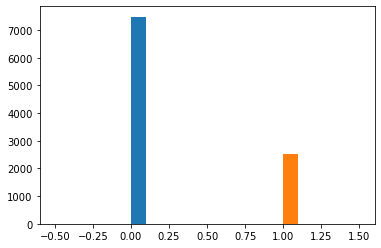

In [35]:
plt.hist(cls_0)
plt.hist(cls_1)
plt.show();

In [36]:
##VARIABLES SELECTED AS PREDICTORS
DISCRETE_VARS = ['no_of_sales_12M_1','no_of_sales_12M_10K','no_of_funds_sold_12M_1','no_of_fund_sales_12M_10K',
                 'no_of_assetclass_sold_12M_1','no_of_assetclass_sales_12M_10K','No_of_fund_curr','No_of_asset_curr']

CONTINUOUS_VARS = ['AUM','sales_curr']

# REGRESSION MODEL

In [39]:
##SPLIT DATA INTO TRAIN & TEST
X_train, X_test, y_train, y_test = train_test_split(X, yreg, test_size=0.1, random_state=5)

In [40]:
y_log_train = np.log1p(y_train)
y_log_test = np.log1p(y_test)

In [41]:
##PIPELINE ASSEMBLER
regression_pipe = Pipeline(
    [
        ('rare_label_encoder', RareLabelEncoder(threshold=0.03, variables=DISCRETE_VARS)),
        
        ('log_transform', LogaritmicTransformation(variables=CONTINUOUS_VARS)),
         
        ('scaler', StandardScaler()),
        
        ('reg_model', Ridge(alpha=0.05, random_state=0))
    ]
)

In [42]:
regression_pipe.fit(X_train, y_log_train)

Pipeline(steps=[('rare_label_encoder',
                 RareLabelEncoder(threshold=0.03,
                                  variables=['no_of_sales_12M_1',
                                             'no_of_sales_12M_10K',
                                             'no_of_funds_sold_12M_1',
                                             'no_of_fund_sales_12M_10K',
                                             'no_of_assetclass_sold_12M_1',
                                             'no_of_assetclass_sales_12M_10K',
                                             'No_of_fund_curr',
                                             'No_of_asset_curr'])),
                ('log_transform',
                 LogaritmicTransformation(variables=['AUM', 'sales_curr'])),
                ('scaler', StandardScaler()),
                ('reg_model', Ridge(alpha=0.05, random_state=0))])

In [43]:
y1_pred = regression_pipe.predict(X_train)
y2_pred = regression_pipe.predict(X_test)

In [44]:
##EVALUATION
print('MSE for Train:{}'.format(mean_squared_error(y_log_train,y1_pred)))
print('RMSE for Train:{}'.format(np.sqrt(mean_squared_error(y_log_train,y1_pred))))
print('R2 for Train:{}'.format(r2_score(y_log_train,y1_pred)))
print()
print('MSE for Test:{}'.format(mean_squared_error(y_log_test,y2_pred)))
print('RMSE for Test:{}'.format(np.sqrt(mean_squared_error(y_log_test,y2_pred))))
print('R2 for Test:{}'.format(r2_score(y_log_test,y2_pred)))

MSE for Train:15.07133610703737
RMSE for Train:3.882181874543923
R2 for Train:0.5130636460879996

MSE for Test:13.940477371516423
RMSE for Test:3.7336948685606894
R2 for Test:0.5519942914988312


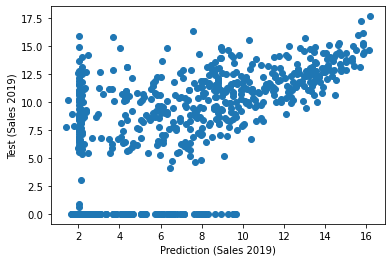

In [45]:
plt.scatter(y2_pred, y_log_test)
plt.xlabel('Prediction (Sales 2019)')
plt.ylabel('Test (Sales 2019)')
plt.show();

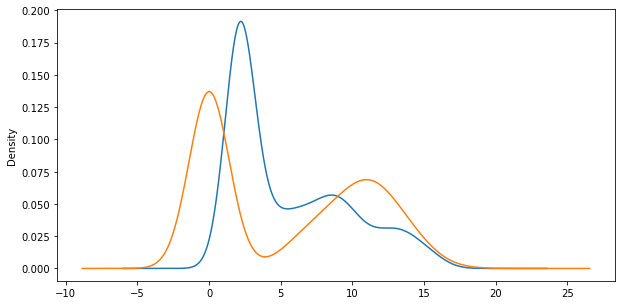

In [46]:
sales_pred = pd.Series(y2_pred, index=y_test.index)

fig, ax = plt.subplots(1,1,figsize=(10,5))
sales_pred.plot(kind='kde', ax=ax)
y_log_test.plot(kind='kde', ax=ax)
plt.show();

<AxesSubplot:>

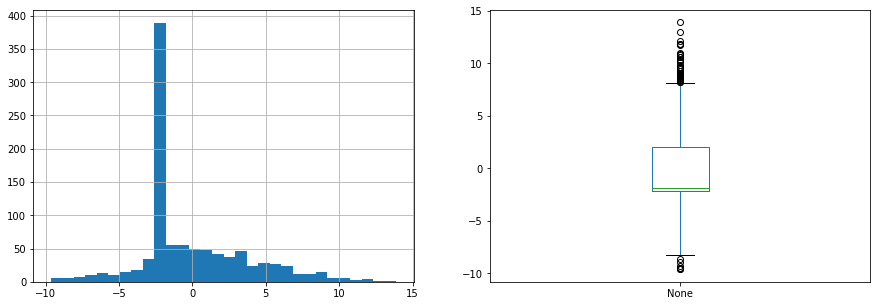

In [47]:
resid = (y_log_test - sales_pred)
fig, ax = plt.subplots(1,2,figsize=(15,5))
resid.hist(bins=30, ax=ax[0])
resid.plot.box(ax=ax[1])

# CLASSIFICATION MODEL

In [88]:
##SPLIT DATA INTO TRAIN & TEST
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X, ycls, test_size=0.1, random_state=5)

In [100]:
##PIPELINE ASSEMBLER
classification_pipe = Pipeline(
    [
        ('rare_label_encoder', RareLabelEncoder(threshold=0.03, variables=DISCRETE_VARS)),
        
#         ('binarization', Binarization(bins=20, variables=CONTINUOUS_VARS)),
        
#         ('discrete_encoder', DiscreteEncoder(variables=CONTINUOUS_VARS)),
         
        ('scaler', StandardScaler()),
        
        ('pca', PCA(n_components=0.95, svd_solver='full')),
        
        ('class_model', RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced',random_state=0))

    ]
)

In [101]:
classification_pipe.fit(Xc_train, yc_train)

Pipeline(steps=[('rare_label_encoder',
                 RareLabelEncoder(threshold=0.03,
                                  variables=['no_of_sales_12M_1',
                                             'no_of_sales_12M_10K',
                                             'no_of_funds_sold_12M_1',
                                             'no_of_fund_sales_12M_10K',
                                             'no_of_assetclass_sold_12M_1',
                                             'no_of_assetclass_sales_12M_10K',
                                             'No_of_fund_curr',
                                             'No_of_asset_curr'])),
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.95, svd_solver='full')),
                ('class_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        random_state=0))])

In [102]:
y1_prob = classification_pipe.predict_proba(X_train)[:,1]
y2_prob = classification_pipe.predict_proba(X_test)[:,1]

In [103]:
##EVALUATION
print('Train ROC-AUC:{}'.format(roc_auc_score(yc_train,y1_prob)))
print('Test ROC-AUC:{}'.format(roc_auc_score(yc_test,y2_prob)))

Train ROC-AUC:0.7400890270210688
Test ROC-AUC:0.7168530599565083


### _CLASSIFICATION REPORT_

The classification report is a key metrics in a classification problem. It shows:for each class you're trying to find.

- Precision which means `how many of all predictions were correctly classified` **_Precision = TP/(TP+FP)_**
- Recall which means `how many of this class were correctly classified` **_Recall = TP/(TP+FN)_**
- F1-score which is the `harmonic mean between precision & recall` **_F1 = 2*Precision*Recall/Precision+Recall_**

The support is the number of occurence of the given class in the dataset

In [104]:
x1_pred = classification_pipe.predict(X_train)
x2_pred = classification_pipe.predict(X_test)

In [105]:
print('Train Dataset Report:')
print(classification_report(yc_train,x1_pred))
print('Test Dataset Report:')
print(classification_report(yc_test,x2_pred))

Train Dataset Report:
              precision    recall  f1-score   support

           0       0.88      0.60      0.71      6744
           1       0.39      0.76      0.51      2260

    accuracy                           0.64      9004
   macro avg       0.63      0.68      0.61      9004
weighted avg       0.76      0.64      0.66      9004

Test Dataset Report:
              precision    recall  f1-score   support

           0       0.88      0.58      0.70       740
           1       0.39      0.77      0.52       261

    accuracy                           0.63      1001
   macro avg       0.64      0.68      0.61      1001
weighted avg       0.75      0.63      0.65      1001



In [106]:
tn,fp,fn,tp = confusion_matrix(yc_train,x1_pred).ravel()
print('TN:{0} FP:{1} N:{2}'.format(tn,fp,(tn+fp)))
print('TP:{0} FN:{1} P:{2}'.format(tp,fn,(tp+fn)))
confusion_matrix(yc_train,x1_pred)

TN:4042 FP:2702 N:6744
TP:1712 FN:548 P:2260


array([[4042, 2702],
       [ 548, 1712]], dtype=int64)

In [107]:
tn,fp,fn,tp = confusion_matrix(yc_test,x2_pred).ravel()
print('TN:{0} FP:{1} N:{2}'.format(tn,fp,(tn+fp)))
print('TP:{0} FN:{1} P:{2}'.format(tp,fn,(tp+fn)))
confusion_matrix(yc_test,x2_pred)

TN:432 FP:308 N:740
TP:201 FN:60 P:261


array([[432, 308],
       [ 60, 201]], dtype=int64)